- dataset: https://www.kaggle.com/datasets/outliersloop/footballyolov8
- yolov8 github: https://github.com/ultralytics/ultralytics
- yolov8 docs: https://docs.ultralytics.com/quickstart/

In [ ]:

# Pip install (recommended)

!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 5.1 MB/s eta 0:00:00


# Creating train-val split

In [ ]:
## importing required libraries
import os
import shutil
import random

# for anchor box adjustment
from sklearn.cluster import KMeans
import numpy as np

!pip install tqdm --upgrade
from tqdm.notebook import tqdm


# Pip install (recommended)
!pip install ultralytics opencv-python-headless

import cv2



In [ ]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

In [ ]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)



    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/MyDrive/yolov8/data/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images

------ PROCESS STARTED -------
--- This folder has a total number of 3013 images---


  0%|          | 0/2411 [00:00<?, ?it/s]

------ Training data created with 80% split 2411 images -------


  0%|          | 0/602 [00:00<?, ?it/s]

------ Testing data created with a total of 602 images ----------
------ TASK COMPLETED -------


In [ ]:
# Function to calculate anchor boxes
def calculate_anchor_boxes(annotation_path, num_clusters=9):
    box_dimensions = load_bounding_box_dimensions(annotation_path)
    kmeans = KMeans(n_clusters=num_clusters, random_state=2)
    kmeans.fit(box_dimensions)
    return kmeans.cluster_centers_

In [ ]:
def load_bounding_box_dimensions(annotation_path):
    box_dimensions = []
    for filename in os.listdir(annotation_path):
        if filename.endswith('.txt'):
            with open(os.path.join(annotation_path, filename), 'r') as file:
                for line in file:
                    elements = line.split()
                    # Process every bounding box in a line
                    for i in range(0, len(elements), 5):
                        if i + 4 < len(elements):  # Ensure there are enough elements for a full bounding box
                            try:
                                width = float(elements[i + 3])
                                height = float(elements[i + 4])
                                box_dimensions.append([width, height])
                            except ValueError:
                                print(f"Error processing line in file {filename}: {line}")
                                continue
    return np.array(box_dimensions)

# Call the function and check the output
anchor_boxes = calculate_anchor_boxes(train_path_label)
print("Calculated Anchor Boxes (Width, Height):")
print(anchor_boxes)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculated Anchor Boxes (Width, Height):
[[0.29261247 0.26026038]
 [0.78461932 0.69761571]
 [0.43399778 0.49166355]
 [0.5353829  0.74250841]
 [0.78482623 0.32811965]
 [0.54630986 0.24683754]
 [0.20879166 0.50137467]
 [0.63963468 0.50343964]
 [0.2948376  0.73542042]]


In [ ]:
# Calculate anchor boxes
anchor_boxes = calculate_anchor_boxes(train_path_label)
print("Calculated Anchor Boxes (Width, Height):")
print(anchor_boxes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculated Anchor Boxes (Width, Height):
[[0.29261247 0.26026038]
 [0.78461932 0.69761571]
 [0.43399778 0.49166355]
 [0.5353829  0.74250841]
 [0.78482623 0.32811965]
 [0.54630986 0.24683754]
 [0.20879166 0.50137467]
 [0.63963468 0.50343964]
 [0.2948376  0.73542042]]


In [ ]:
# def apply_mixup(image1, image2, alpha=1.0):
#     lambda_ = np.random.beta(alpha, alpha, 1)
#     mixed_image = cv2.addWeighted(image1, lambda_, image2, 1 - lambda_, 0)
#     return mixed_image

def apply_mixup(image1, image2, alpha=1.0):
    lambda_ = np.random.beta(alpha, alpha, 1)[0]  # Directly index the first (and only) element
    mixed_image = cv2.addWeighted(image1, lambda_, image2, 1 - lambda_, 0)
    return mixed_image


In [ ]:
def apply_mosaic(images):
    # Assuming images is a list of four CV2 images
    img1, img2, img3, img4 = images
    # Resize images to half the size of the first image
    h, w = img1.shape[:2]
    img1 = cv2.resize(img1, (w // 2, h // 2))
    img2 = cv2.resize(img2, (w // 2, h // 2))
    img3 = cv2.resize(img3, (w // 2, h // 2))
    img4 = cv2.resize(img4, (w // 2, h // 2))
    # Combine images
    top = np.concatenate((img1, img2), axis=1)
    bottom = np.concatenate((img3, img4), axis=1)
    mosaic_image = np.concatenate((top, bottom), axis=0)
    return mosaic_image


In [ ]:
def augment_dataset(image_dir, augmentation_func, output_dir, alpha=1):
    os.makedirs(output_dir, exist_ok=True)
    images = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')]
    for i in tqdm(range(0, len(images), 4), desc="Augmenting Dataset"):
        img_paths = images[i:i+4]
        loaded_imgs = [cv2.imread(path) for path in img_paths if path]
        if augmentation_func == 'mixup' and len(loaded_imgs) >= 2:
            # Apply mixup to the first two images
            mixed_img = apply_mixup(loaded_imgs[0], loaded_imgs[1], alpha)
            cv2.imwrite(os.path.join(output_dir, f"mixup_{i}.jpg"), mixed_img)
        elif augmentation_func == 'mosaic' and len(loaded_imgs) == 4:
            # Apply mosaic to four images
            mosaic_img = apply_mosaic(loaded_imgs)
            cv2.imwrite(os.path.join(output_dir, f"mosaic_{i}.jpg"), mosaic_img)


In [ ]:
def merge_datasets(source_dirs, target_dir):
    os.makedirs(target_dir, exist_ok=True)
    for source_dir in source_dirs:
        for file in tqdm(os.listdir(source_dir), desc=f"Merging from {source_dir}"):
            shutil.copy2(os.path.join(source_dir, file), target_dir)


In [ ]:
# Apply Mixup and Mosaic augmentations
augment_dataset(train_path_img, 'mixup', './yolo_data/images/train_mixup/', alpha=1.0)
augment_dataset(train_path_img, 'mosaic', './yolo_data/images/train_mosaic/')

# Merge augmented datasets with the original training dataset
merge_datasets(['./yolo_data/images/train_mixup/', './yolo_data/images/train_mosaic/'], train_path_img)


Augmenting Dataset:   0%|          | 0/603 [00:00<?, ?it/s]

Augmenting Dataset:   0%|          | 0/603 [00:00<?, ?it/s]

Merging from ./yolo_data/images/train_mixup/:   0%|          | 0/603 [00:00<?, ?it/s]

Merging from ./yolo_data/images/train_mosaic/:   0%|          | 0/602 [00:00<?, ?it/s]

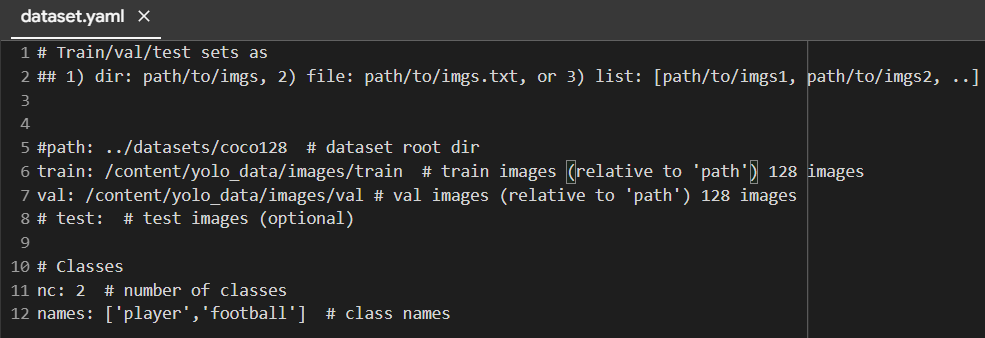

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


## Training

In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/yolov8/training_results/wastePile9/weights/best.pt data=/content/drive/MyDrive/yolov8/dataset.yaml epochs=50 imgsz=640 batch=8 project=/content/drive/MyDrive/yolov8/training_results name=wastePile

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolov8/training_results/wastePile9/weights/best.pt, data=/content/drive/MyDrive/yolov8/dataset.yaml, epochs=100, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=wastePile11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

## Inferencing

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/wastePile11/weights/best.pt conf=0.55 source=/content/drive/MyDrive/yolov8/test_images

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43621257 parameters, 0 gradients, 164.9 GFLOPs

image 1/5 /content/drive/MyDrive/yolov8/test_images/0d61b8e2-6798-11e5-8c9e-40f2e96c8ad8.jpg: 480x640 14 aluminum - Non_biodegradable-Recyclables, 1 plastic bag - Non_Biodegradable, 74.0ms
image 2/5 /content/drive/MyDrive/yolov8/test_images/0eb3e722-679f-11e5-b0e3-40f2e96c8ad8.jpg: 448x640 1 plastic bag - Non_Biodegradable, 70.9ms
image 3/5 /content/drive/MyDrive/yolov8/test_images/1be2caac-679b-11e5-af8c-40f2e96c8ad8.jpg: 480x640 4 aluminum - Non_biodegradable-Recyclables, 2 fruit peels - Biodegradables, 51.9ms
image 4/5 /content/drive/MyDrive/yolov8/test_images/4f48b352-679b-11e5-af8c-40f2e96c8ad8.jpg: 480x640 2 food wrapper - Non_Biodegradables, 1 plastic bag - Non_Biodegradable, 1 plastic sachet - Non_Biodegradable, 45.2ms
image 5/5 /content/drive/MyDrive/yolov8/test_images/pile_10.jpg: 480x640 1 aluminum - Non_biod

In [ ]:
!cp -r /content/runs/detect/predict4 /content/drive/MyDrive/yolov8/output

### inferencing on video


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/wastePile10/weights/best.pt conf=0.77 source=/content/drive/MyDrive/yolov8/Videos

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43621257 parameters, 0 gradients, 164.9 GFLOPs

video 1/3 (1/256) /content/drive/MyDrive/yolov8/Videos/IMG_4797.MOV: 640x384 1 pet bottle - Non_Biodegradable-Recyclable, 83.5ms
video 1/3 (2/256) /content/drive/MyDrive/yolov8/Videos/IMG_4797.MOV: 640x384 1 pet bottle - Non_Biodegradable-Recyclable, 40.8ms
video 1/3 (3/256) /content/drive/MyDrive/yolov8/Videos/IMG_4797.MOV: 640x384 1 pet bottle - Non_Biodegradable-Recyclable, 39.6ms
video 1/3 (4/256) /content/drive/MyDrive/yolov8/Videos/IMG_4797.MOV: 640x384 1 pet bottle - Non_Biodegradable-Recyclable, 39.6ms
video 1/3 (5/256) /content/drive/MyDrive/yolov8/Videos/IMG_4797.MOV: 640x384 1 pet bottle - Non_Biodegradable-Recyclable, 39.6ms
video 1/3 (6/256) /content/drive/MyDrive/yolov8/Videos/IMG_4797.MOV: 640x384 1 pet bottle - Non_Biodegradable-Recyclable, 39.7ms
video 1/3 (7/256) /content/drive/MyDrive/yolov8/Videos/IM

In [ ]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/yolov8/output

In [ ]:
# !yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt conf=0.5 source=/content/drive/MyDrive/yolov8/videos

In [ ]:
# !cp -r /content/runs/detect/predict3 /content/drive/MyDrive/yolov8/output

## Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/

In [ ]:
!yolo mode=export model=/content/drive/MyDrive/yolov8/training_results/wastePile2/weights/best.pt format=tflite

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 268 layers, 43621257 parameters, 0 gradients, 164.9 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/yolov8/training_results/wastePile2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 23, 8400) (83.6 MB)
2024-02-03 08:23:42.721014: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 08:23:42.721062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 08:23:42.722500: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ult